In [2]:
import pandas as pd
data = pd.read_csv(r"data/train.csv",encoding = 'ISO-8859-1', index_col=0)
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier

start_col = 0
n = data.shape[0]
p=data.shape[1] - start_col
X=data.loc[:, data.columns[start_col]:data.columns[start_col + p - 1]].to_numpy().reshape([n,p])


d = 30000

train = X[:d]
train_target = data.index[:d]
test = X[d:]
test_target = data.index[d:]

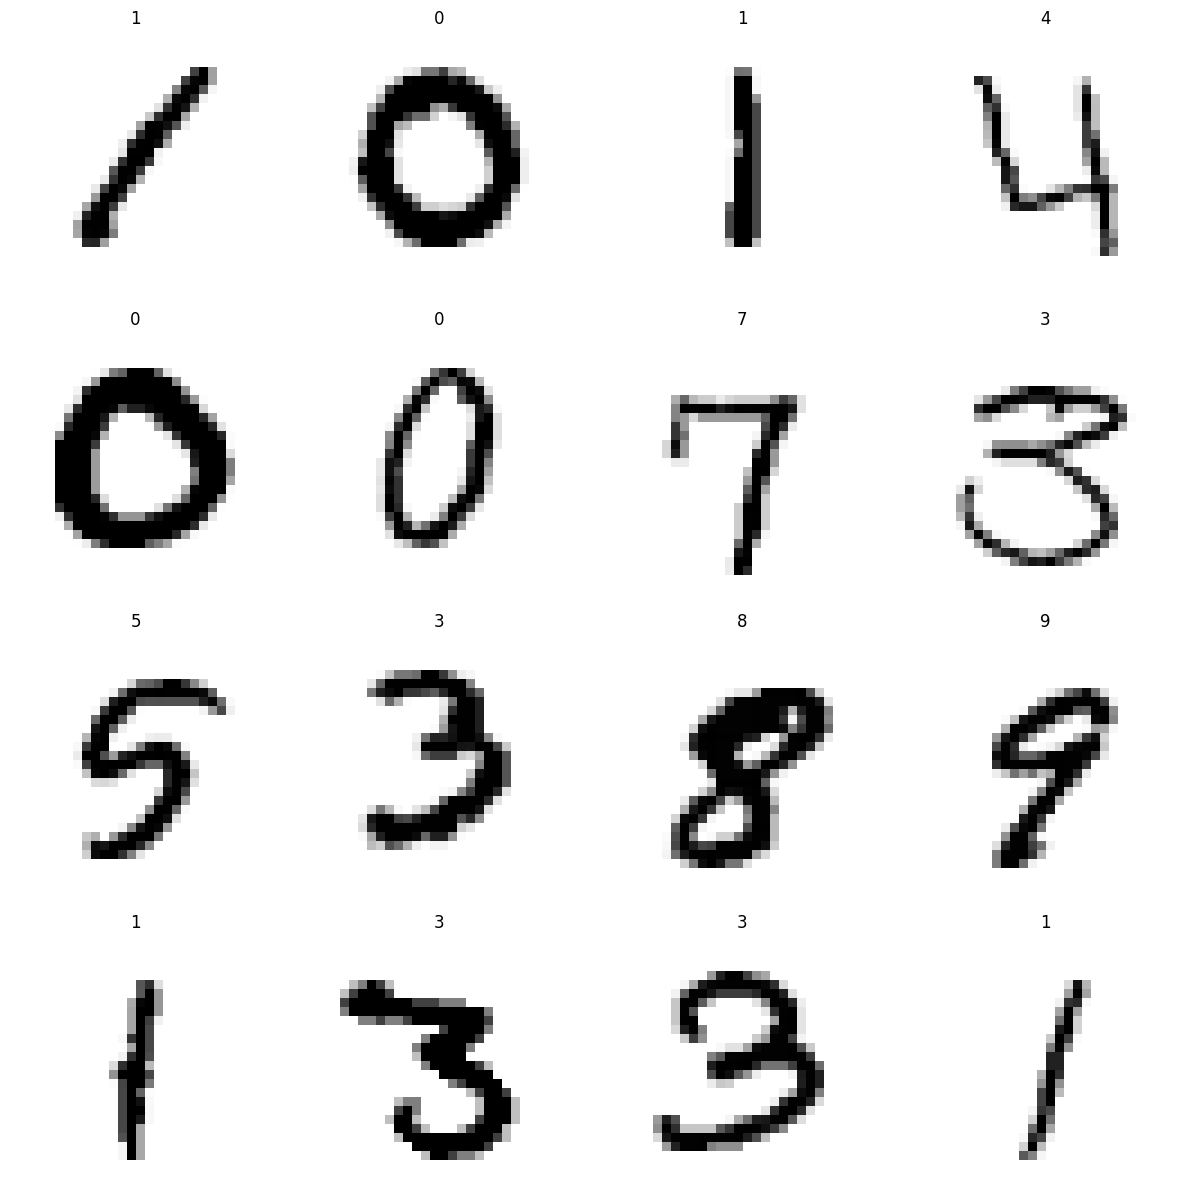

In [4]:
def im_array(L):
    IM = []
    for i in range(28):
        x = []
        for j in range(28):
            x.append(L[28*i + j])
        IM.append(x)
    return IM

def plot_multi(data, target, i):
    nplots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(im_array(data[i+j]), cmap='binary')
        plt.title(target[i+j])
        plt.axis('off')
    plt.show()

plot_multi(train, train_target, 0)

In [5]:
""" mlp = MLPClassifier(hidden_layer_sizes=(150,), activation='logistic', alpha=1e-5,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=0.00001, verbose=True) """

mlp=MLPClassifier(solver='adam',hidden_layer_sizes=500,alpha=1e-06)

mlp.fit(train,train_target)

MLPClassifier(alpha=1e-06, hidden_layer_sizes=500)

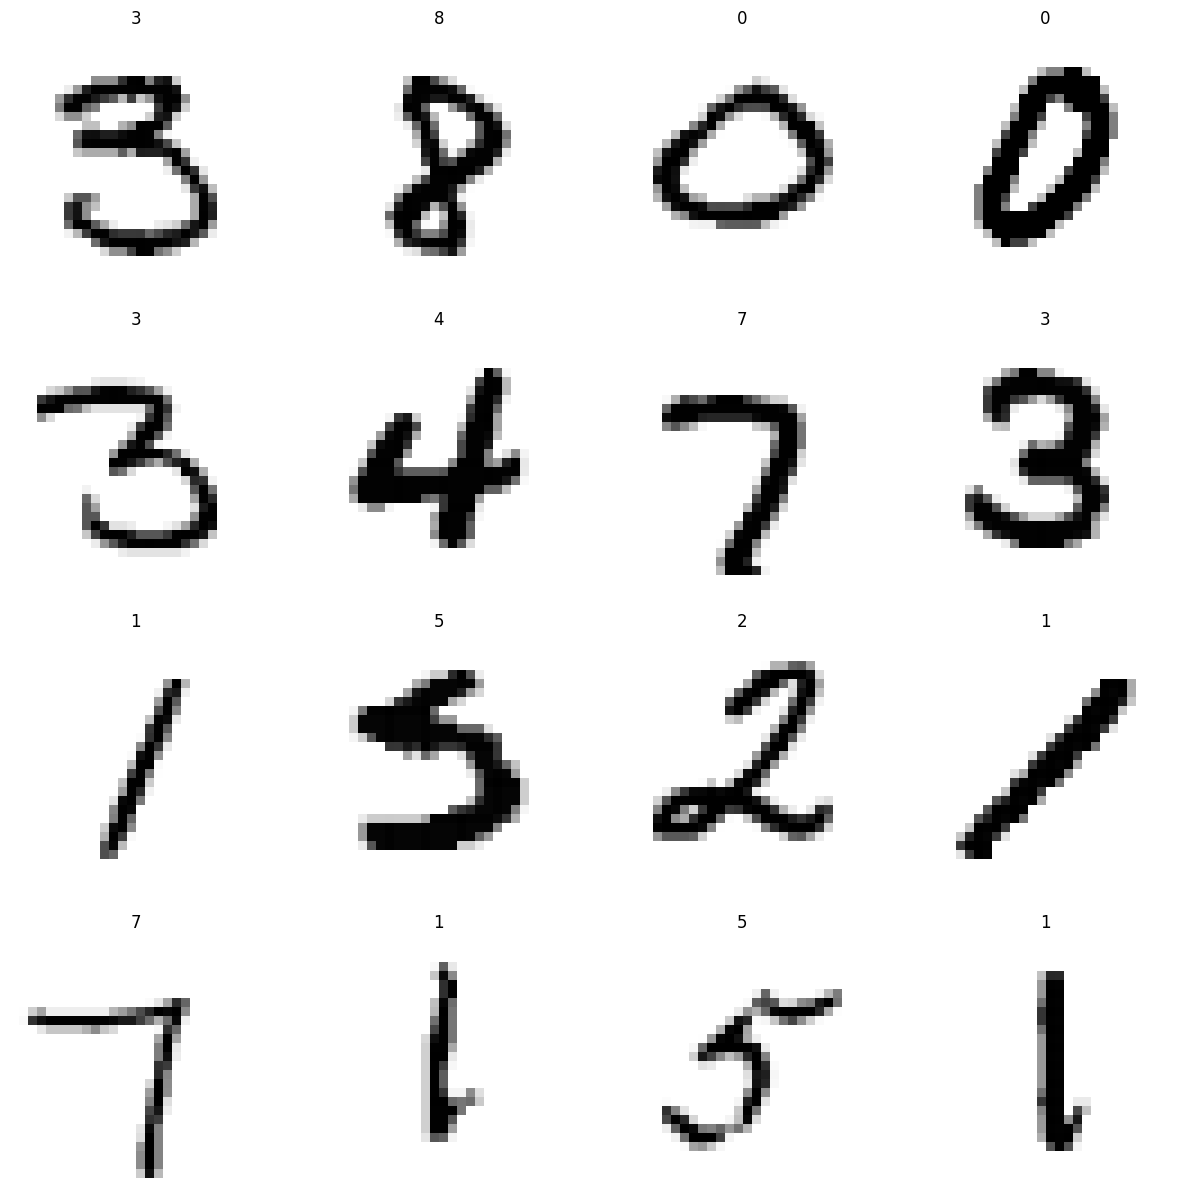

In [12]:
prediction = mlp.predict(test)

plot_multi(test, prediction, 0)

# pd.DataFrame(prediction).to_csv('prediction.csv')

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(test_target, prediction)

0.9678333333333333

In [8]:
import tkinter
from PIL import Image
from skimage.transform import resize

fenetre=0
canvas=0

lastX=0
lastY=0

couleur='black'

def click(event):
    global lastX, lastY
    lastX=event.x
    lastY=event.y

def move(event):
    global lastX, lastY
    canvas.create_line(lastX, lastY, event.x, event.y, fill=couleur, width=100)
    lastX=event.x
    lastY=event.y

def initFenetre():
    global fenetre, canvas
    fenetre=tkinter.Tk()
    fenetre.title('Digit recongnizer')
    fenetre.state('normal')
    canvas = tkinter.Canvas(fenetre, width=1000, height=1000, bg='white')
    canvas.bind('<Button-1>', click)
    canvas.bind('<B1-Motion>', move)

def clear():
    canvas.delete(tkinter.ALL)

def save_as_png():
    canvas.postscript(file = r'data/digit' + '.eps')
    img = Image.open(r'data/digit' + '.eps')
    img.save(r'data/digit' + '.png', 'png')

def predict():
    save_as_png()
    im = plt.imread(r'data/digit.png')
    res = resize(im, (28,28))
    res = res[:,:,2].reshape(784,)
    for i in range(784):
        res[i] = int(abs(res[i] - 1)*255)
    predict = mlp.predict(res.reshape(1,784))
    label2["text"]="%3s" %predict[0]

initFenetre()
canvas.grid(row=0, column=0, rowspan=4)
btn1=tkinter.Button(fenetre, text="submit", command=predict)
btn1.grid(row=0, column=1, sticky=tkinter.N)
btn2=tkinter.Button(fenetre, text="clear", command=clear)
btn2.grid(row=0, column=2, sticky=tkinter.N)
label1=tkinter.Label(fenetre, text="Digit :", bg='red', width=15)
label1.grid(row=1, column=1, sticky=tkinter.N)
label2=tkinter.Label(fenetre, text="%3s" %0, width=15)
label2.grid(row=1, column=2, sticky=tkinter.N)
fenetre.mainloop()

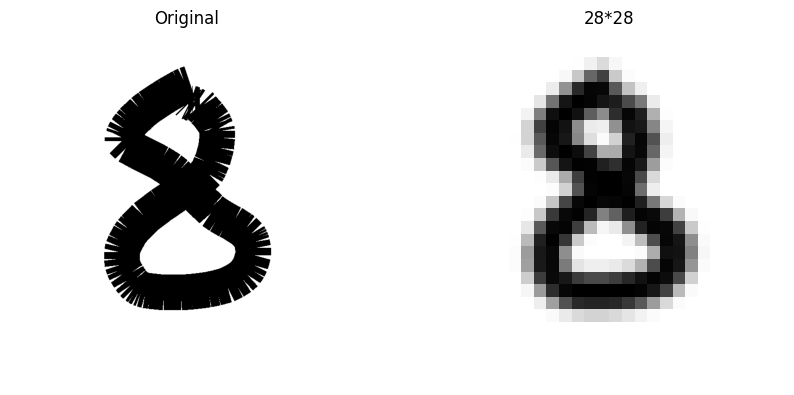

In [9]:
from skimage.transform import resize

im = plt.imread(r'data/digit.png')
res = resize(im, (28,28))
res = res[:,:,2].reshape(784,)
for i in range(784):
    res[i] = int(abs(res[i] - 1)*255)

fig = plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(im, cmap='binary')
plt.title("Original")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(im_array(res), cmap='binary')
plt.title("28*28")
plt.axis('off')
plt.show()

In [10]:
predict = mlp.predict(res.reshape(1,784))
print(predict)

[2]
